# Black Holes At Home Tutorial: Psi4 to Mesh

## Author: Tyndale Stutzman, Seth Winchell, Joey Perko

## This tutorial demonstrates how to extrapolate xyz mesh data from psi4 data

## Introduction: 

The purpose of this notebook is to outline and demonstrate the process of converting psi4 data, produced by the [BlackHoles@Home](https://blackholesathome.net) project, into a folder of time dependent `.vtk` mesh files. It is important for the psi4 data to be extrapolated to time dependent xyz in order to generate a mesh from spherical or catesian coordinates in either two or three dimentions. Once a Fast Fourier Transform (FFT) has been applied to psi4, yielding strain against time, several different directions can be taken. This notebook examines the use of  FFT with spherical harmonics and a time interpolation to produce a time dependent mesh ranging from radius 100 to 2000. The following steps were used:

<a id='toc'></a>

# Table of Contents:
$$\label{toc}$$
<!--these buttons aren't functioning properly so maybe figure that out-->
1. [Preliminaries](#maths): A Brief Mathematical Background
    1. [I](#intro): Overview
    1. [II](#fft): Fast fourier transform
    1. [III](#spharm): Spin-weight spherical harmonics
1. [Step 1](#strain): Psi4 to Strain
    1. [Step 1.a](#comp): Compute first and second time derivatives
    1. [Step 1.b](#calc): Calculate phase and amplitude
    1. [Step 1.c](#comp_fft):Perform complex FFT
1. [Step 2](#plot): Validate Strain Against Time
1. [Step 3](#solve): Compute Strain with Spherical Harmonics
    1. [Step 3.a](#interpolation): Create time interpolation
    1. [Step 3.b](#theta_phi): Calculate theta and phi
    1. [Step 3.c](#sum): Compute and sum over time
    

<a id='maths'></a>

# Preliminaries: A Brief Mathematical Background \[Back to [top](#toc)\]
$$\label{maths}$$ 

<a id='intro'></a>

## I. Overview
$$\label{intro}$$

In order to understand the procedure of converting psi4 to mesh data, it is helpful to acquire a bit of basic insight to the necessary mathematics. Though psi4 data does contain information about a gravitational wave's amplitude or frequency, it's not immediately available. To extract these data, two important concepts are utilized, as mentioned in the introduction; the Fast Fourier Transform (FFT) and Spin-Weight Spherical Harmonics. For this tutorial, a psi4 data file is initially presented, comprised of eleven columns: time, five columns for the real parts ranging from $m=-2$ to $m=2$ and similarly, five columns for the respective imaginary parts. The final product proceeding the FFT is a file containing the same time column and a real and imaginary column for the second time derivatives, representing the complex strain values for each given time. After verifying the strain data, the spin weight spherical harmonic is computed at each $x$ and $y$ point on the mesh grid. Finally, the spherical harmonic is multiplied by the strain to produce a mesh of the plane at a given time. 

<a id='fft'></a>

## II. Fast fourier transform
$$\label{fft}$$

Any field involving partial differential equations or signal processing will undoubtedly utilize the FFT at some point. The FFT is in incredibly powerful tool as it can decipher complex and muddled signals, yielding only the essential ingredients involved. The process is similar to taking a fruit smoothie and perfectly determining the amount and type of each fruit that was blended. In terms of waves, these are the frequency, amplitude, and phase of a signal. This is possible because of the theory that any periodic wave can be composed of a sum of sine and cosine functions with different frequencies, called a Fourier Series. 

In the context of gravitational waves, the FFT is used to determine the amplitude and frequency after computing the second time derivative. 

The script bellow simply demonstrates the affect of the Fourier transform. 

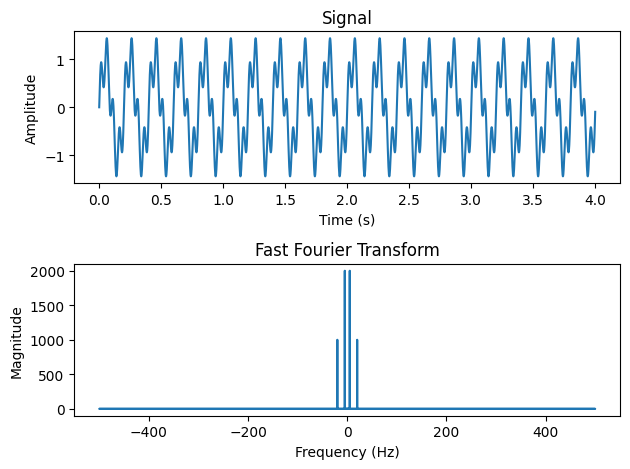

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample signal
duration = 4.0  # Duration of the signal in seconds
sampling_freq = 1000  # Sampling frequency in Hz
num_samples = int(duration * sampling_freq)
time = np.linspace(0, duration, num_samples, endpoint=False)
signal = np.sin(2 * np.pi * 5 * time) + 0.5 * np.sin(2 * np.pi * 20 * time)

# Compute the FFT
fft = np.fft.fft(signal)
freq = np.fft.fftfreq(num_samples, 1/sampling_freq)

# Plot the signal in the time domain
plt.subplot(2, 1, 1)
plt.plot(time, signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal')

# Plot the FFT in the frequency domain
plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Fast Fourier Transform')

# Display the plot
plt.tight_layout()
plt.show()


<a id='spharm'></a>

## III. Spin-weight spherical harmonics
$$\label{spharm}$$\



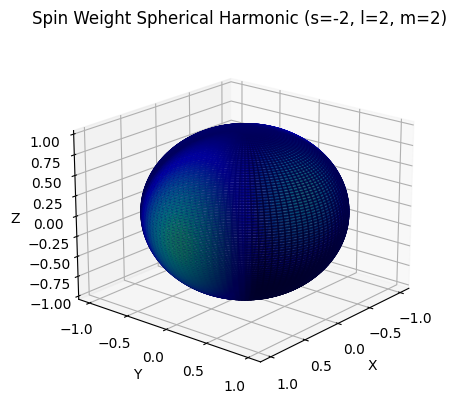

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm

# Parameters
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 100)
theta, phi = np.meshgrid(theta, phi)

# Compute the spin weight spherical harmonic
s = -2  # Spin weight
l = 2  # Degree
m = 2  # Order
Y = sph_harm(m, l, phi, theta).real

# Plot the spin weight spherical harmonic
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(
    np.sin(theta) * np.cos(phi),
    np.sin(theta) * np.sin(phi),
    np.cos(theta),
    rstride=1, cstride=1, facecolors=plt.cm.jet(Y), alpha=0.6
)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Spin Weight Spherical Harmonic (s=-2, l=2, m=2)')
ax.view_init(elev=20, azim=40)
plt.show()


<a id='strain'></a>

# Step 1: Psi4 to Strain \[Back to [top](#toc)\]
$$\label{strain}$$

In this first step, a file with eleven columns is given, containing the modes of $l=2$ and ranging from $m=-2$ to $m=2$, each with a real and imaginary part and finally a single column for time. 

<a id='plot'></a>

# Step 2: Validate Strain Against Time \[Back to [top](#toc)\]
$$\label{plot}$$

Now that our strain data has been generated, we can verify whether or not \[[Step 1](#strain)\] worked properly by plotting strain against time use matplotlib. The plot should indicate that, as time increases, the amplitude of the gravitational waves increases while the phase decreases, ultimately reaching a peak and then quickly going to zero. The following python script was used to verify this. 

In [ ]:
import matplotlib.pyplot as plt

# Gravitational wave strain data and time values
strain = # directory
time = # directory

# Create a line plot of strain data against time
plt.plot(time, strain)

# Set the title and axis labels
plt.title("Gravitational Wave Strain vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Strain")

# Show the plot
plt.show()

<a id='solve'></a>

# Step 3: Compute Strain with Spherical Harmonics \[Back to [top](#toc)\]
$$\label{solve}$$

Once the strain data has been validated, it can be multiplied by the spherical harmonic to give the gravitation wave strain at any time for any given coordinate <!-- fact check this... still a little fuzzy -->. 

<a id='interpolation'></a>

## A. Create Time Interpolation \[Back to [top](#toc)\]
$$\label{interpolation}$$

Since the data is sampled over intervals of `n` seconds, the algorithm needs a way to compute strain at any given time, therefore an interpolation is used. 